# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Load Data

download dataset dari github

In [ ]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-12-06 04:45:05--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.03s   

2019-12-06 04:45:05 (12.1 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



tampilkan dataset

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


ukuran data

In [ ]:
df.shape

(3165, 21)

# Praproses

**search missing value**

melihat info dari setiap kolom atribut apakah ada missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 21 columns):
id               3165 non-null int64
date             3165 non-null object
price            3165 non-null float64
bedrooms         3165 non-null int64
bathrooms        3165 non-null float64
sqft_living      3165 non-null int64
sqft_lot         3165 non-null int64
floors           3165 non-null float64
waterfront       3165 non-null int64
view             3165 non-null int64
condition        3165 non-null int64
grade            3165 non-null int64
sqft_above       3165 non-null int64
sqft_basement    3165 non-null int64
yr_built         3165 non-null int64
yr_renovated     3165 non-null int64
zipcode          3165 non-null int64
lat              3165 non-null float64
long             3165 non-null float64
sqft_living15    3164 non-null float64
sqft_lot15       3164 non-null float64
dtypes: float64(7), int64(13), object(1)
memory usage: 519.3+ KB


**search null value**

mencari null value dengan total nilai kosong disetiap kolom(atribut) 

In [ ]:
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    1
sqft_lot15       1
dtype: int64

**drop null value**

menghapus/drop nilai kosong (null value)

In [ ]:
df = df.dropna() 

**Korelasi Data**

Nilai korelasi (r) berkisar antara 1 sampai -1, nilai semakin mendekati 1 atau -1 berarti hubungan antara dua variabel semakin kuat, sebaliknya nilai mendekati 0 berarti hubungan antara dua variabel semakin lemah. Nilai positif menunjukkan hubungan searah (X naik maka Y naik) dan nilai negatif menunjukkan hubungan terbalik (X naik maka Y turun).

Menurut Sugiyono (2007) pedoman untuk memberikan interpretasi koefisien korelasi sebagai berikut:

0,00 - 0,199 = sangat rendah

0,20 - 0,399 = rendah

0,40 - 0,599 = sedang

0,60 - 0,799 = kuat

0,80 - 1,000 = sangat kuat

disini akan menampilkan atribut dengan nilai korelasi terbesar terhadap atribut price

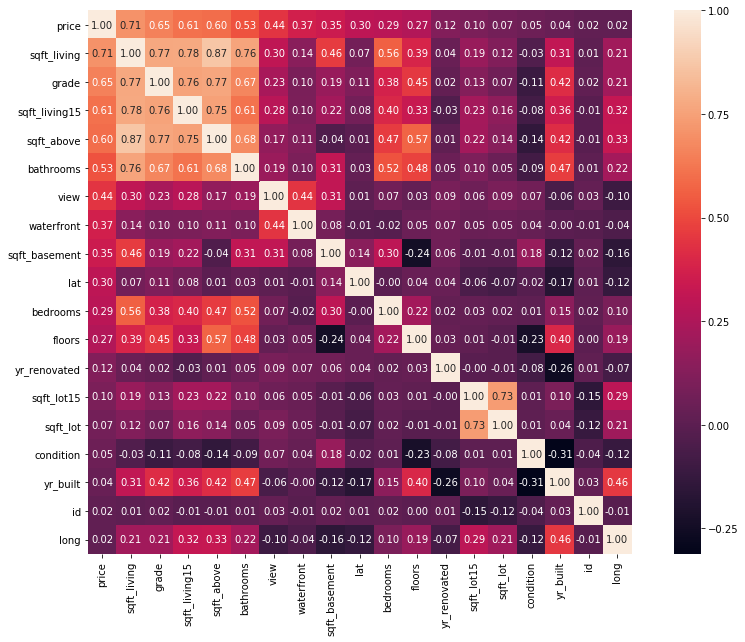

In [ ]:
corr = df.corr()
cols = corr.nlargest(19, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(15,10))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()

**Rangkuman Data**

deskripsi atribut yang akan digunakan 

*Summary Statistic*

DataFrame.count : Hitung jumlah pengamatan non-NA / null.

DataFrame.max : Maksimum nilai dalam objek.

DataFrame.min : Minimum nilai dalam objek.

DataFrame.mean : Nilai rata-rata.

DataFrame.std : Standar deviasi pengamatan.

In [ ]:
df = df[['price','sqft_living','grade','sqft_living15','view','bathrooms','waterfront', 'lat','yr_built','bedrooms']]
df.describe()

,price,sqft_living,grade,sqft_living15,view,bathrooms,waterfront,lat,yr_built,bedrooms
count,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,5.354358e+05,2070.027813,7.615676,1982.544564,0.244311,2.071903,0.009798,47.557868,1967.489254,3.381163
std,3.809004e+05,920.251879,1.166324,686.256670,0.776298,0.768212,0.098513,0.140789,28.095275,0.895472
min,7.500000e+04,380.000000,3.000000,620.000000,0.000000,0.000000,0.000000,47.177500,1900.000000,0.000000
25%,3.150000e+05,1430.000000,7.000000,1480.000000,0.000000,1.500000,0.000000,47.459575,1950.000000,3.000000
50%,4.450000e+05,1910.000000,7.000000,1830.000000,0.000000,2.000000,0.000000,47.572500,1969.000000,3.000000
75%,6.402500e+05,2500.000000,8.000000,2360.000000,0.000000,2.500000,0.000000,47.680250,1990.000000,4.000000
max,5.350000e+06,8010.000000,12.000000,5790.000000,4.000000,6.000000,1.000000,47.777600,2015.000000,8.000000


# Supervised Learning : Regresi

**inisiasi**

- membuat variabel x yang berisi atribut price dan dan atribut y yang berisi dataframe dengan mendrop atribut price

- Split dataset menjadi versi train and test.

In [ ]:
y = df['price']
X = df.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 137)

**Prediksi**

menggunakan support vector regression dengan kernel linear dan C = 1000

hasil prediksi

In [ ]:
regressor = SVR(kernel = 'linear', C=1000)
regressor.fit(X, y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
pred = regressor.predict(X)

In [ ]:
test = pd.DataFrame([y, pred], index = ['price','price_predict'])
test = test.transpose()
test.head()

,price,price_predict
0,221900.0,309015.576191
1,538000.0,564263.172187
2,180000.0,407863.399713
3,604000.0,422916.646537
4,510000.0,440769.551875


**Metrics Evaluation**

- MSE (Mean Squared Error) mewakili perbedaan antara nilai-nilai asli dan prediksi yang diekstraksi dengan kuadrat perbedaan rata-rata atas kumpulan data.

- MAE (Mean absolute error) mewakili perbedaan antara nilai asli dan prediksi yang diekstraksi dengan rata-rata perbedaan absolut atas kumpulan data.

- R-squared (Koefisien determinasi) mewakili koefisien seberapa baik nilai-nilai tersebut sesuai dengan nilai-nilai aslinya. Nilai dari 0 hingga 1 diartikan sebagai persentase. Semakin tinggi nilainya, semakin baik modelnya.

In [ ]:
mse = mean_squared_error(test['price'], test['price_predict'])
mae = mean_absolute_error(test['price'], test['price_predict'])
rscore = r2_score(test['price'], test['price_predict'])
rmse = np.sqrt(mse)

In [ ]:
print(mse)

57025015177.36796


In [ ]:
print(mae)

130739.23320058736


In [ ]:
print(rscore)

0.6068304678760256


In [ ]:
print(rmse)

238799.11050372018
